Homework 6

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-23 11:43:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv.3'

     0K .......... .......... .......... .......... ..........  3%  769K 2s
    50K .......... .......... .......... .......... ..........  7% 2.78M 1s
   100K .......... .......... .......... .......... .......... 10% 1.25M 1s
   150K .......... .......... .......... .......... .......... 14% 4.13M 1s
   200K .......... .......... .......... .......... .......... 17% 1.46M 1s
   250K .......... .......... .......... .......... .......... 21% 3.07M 1s
   300K .......... .......... .......... .......... .......... 25% 5.06M 1s
   350K .......... .......... 

In [4]:
data = pd.read_csv('housing.csv.1')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:

data = data[data.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
data.total_bedrooms = data.total_bedrooms.fillna(0)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(9411, 3138, 3138)

In [8]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,134100.0,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,321800.0,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,110400.0,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,168200.0,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,156600.0,<1H OCEAN


In [9]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

df_train.drop(columns=['median_house_value'], inplace=True)
df_val.drop(columns=['median_house_value'], inplace=True)
df_test.drop(columns=['median_house_value'], inplace=True)

In [10]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [11]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [12]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=1, random_state=1)

In [13]:
y_pred = rf.predict(X_val)

In [14]:
rmse = mean_squared_error(y_val, y_pred, squared = False)
rmse

0.24527740463893763

In [15]:
def rmse_cust(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [16]:
rmse_cust(y_val, y_pred)

0.24527740463893763

In [17]:
for n in range(10, 201, 10):
    print(n)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [18]:
rmse_scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=4)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared = False)
    rmse_scores.append((n, rmse))


(0.233, 0.235)

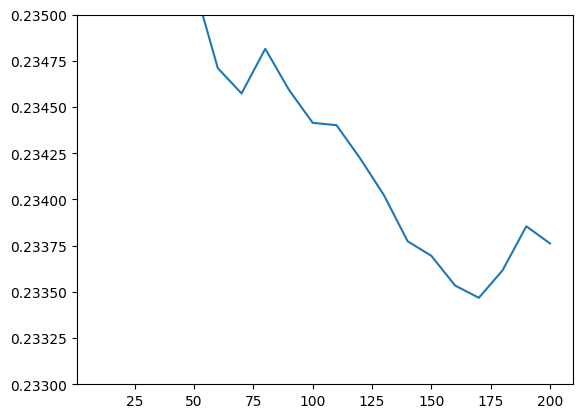

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

df_scores = pd.DataFrame(rmse_scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.ylim(0.233, 0.235)

In [ ]:
df_scores

NameError: name 'df_scores' is not defined

In [ ]:
mean_rmse = []
rmse_scores = []

for max_depth in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        print(max_depth,n)
        rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=4)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared = False)
        rmse_scores.append((n, rmse))
        